# Graphs of functions and results in python

Plots of some of my used functions.

### Plotting activation functions

In [1]:
import pandas as pd
import math 
import matplotlib.pyplot as plt
import numpy as np
import math
  
x = np.linspace(-2.5, 2.5, 200)

##### Sigmoid

In [2]:
y_sigmoid = 1/(1 + np.exp(-x))

##### Tanh

In [3]:
y_tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

##### Relu

In [4]:
y_relu = np.maximum(0,x)

##### Linear

In [5]:
y_lin = x

##### Step

In [6]:
y_step = (x >= 0).astype(float)

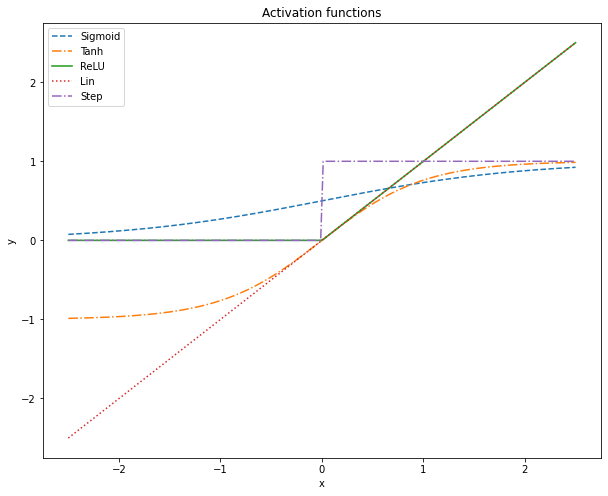

In [7]:
plt.figure(figsize=(10,8))
plt.plot(x, y_sigmoid,"--", label = "Sigmoid")
plt.plot(x, y_tanh,'-.', label = "Tanh")
plt.plot(x, y_relu, label = "ReLU", lw=1.6)
plt.plot(x, y_lin, ':', label = "Lin")
plt.plot(x, y_step, "-.", label = "Step")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Activation functions")
plt.legend()
  
plt.show()

## Plot BTC-BUSD 

In [8]:
BTC_df =  pd.read_csv("crypto_data/btc-usd-max.csv", index_col="snapped_at", parse_dates=True)

In [9]:
BTC_df = BTC_df[["price"]]
BTC_df_2017_now = BTC_df.loc["2017-09-01":"2018-06-14"]
BTC_df_downloaded = BTC_df.loc["2018-06-14":"2018-08-25"].copy()
BTC_df_downloaded.rename(columns={"price":"downloaded_df"}, inplace=True)
BTC_df_collected = BTC_df.loc["2020-09-28":"2020-11-08"].copy()
BTC_df_collected.rename(columns={"price":"collected_df"}, inplace=True)
BTC_df_final = BTC_df.loc["2021-02-01":"2021-07-01"].copy()
BTC_df_final.rename(columns={"price":"final_df"}, inplace=True)

In [10]:
BTC_to_plot = pd.concat([BTC_df.loc["2017-09-01":"2018-06-14"], BTC_df_downloaded, BTC_df.loc["2018-08-25":"2020-09-28"], BTC_df_collected, BTC_df.loc["2020-11-08":"2021-02-01"], BTC_df_final, BTC_df.loc["2021-07-01":]])

<AxesSubplot:xlabel='Datetime', ylabel='Price [$]'>

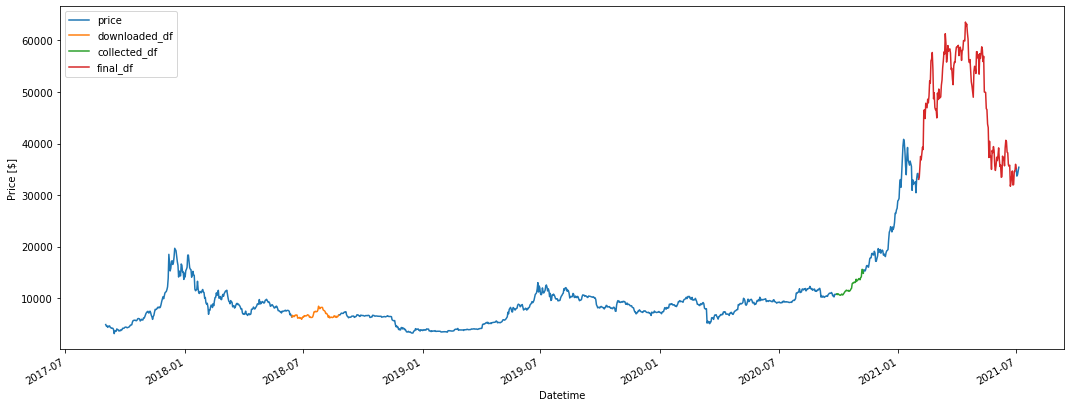

In [11]:
BTC_to_plot.plot(figsize=(18,7), xlabel="Datetime", ylabel="Price [$]")

## Plot model results


### PCT models

In [12]:
pct_results = pd.read_excel("models_comparsion.xlsx" , skiprows = 158, usecols="D:K,U")  
pct_results.dropna(thresh=3, inplace=True)

In [13]:
pct_results.fillna(method='ffill', inplace=True)

In [14]:
pct_results.rename(columns={"Loss":"val_loss","MAE ":"val_MAE","Loss.1":"test_loss","MAE .1":"test_MAE","Loss.2":"recent_loss","MAE":"recent_MAE","Unnamed: 20":"Model_name", "Directory":"Directory_name"}, inplace=True)

In [15]:
pct_results

,Cells,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE,Compile_settings,Directory_name
0,LSTM,1.34053,0.604870,0.96920,0.46591,2.72200,0.80837,comp_3,07_04_2021
1,LSTM - bidirectional,0.10966,0.072100,0.08250,0.05775,0.21905,0.09381,comp_3,07_04_2021
2,GRU,1.41044,0.629290,1.05040,0.49142,2.82490,0.88037,comp_3,07_04_2021
3,GRU - bidirectional,0.11339,0.074380,0.08320,0.05845,0.22081,0.09752,comp_3,07_04_2021
4,LSTM (single),1.29226,0.575150,0.97970,0.44758,2.57060,0.70665,comp_3,07_04_2021
...,...,...,...,...,...,...,...,...,...
124,GRU - bidirectional (single),1.29295,0.568507,0.97897,0.43654,2.57128,0.69421,comp_14,28_04_2021
129,LSTM,1.29295,0.568507,0.97897,0.43654,2.57128,0.69421,comp_15,15_07_2021_big
138,LSTM,1.29295,0.568507,0.97897,0.43654,2.57128,0.69421,comp_16,16_07_2021_big
147,LSTM,1.29295,0.568507,0.97897,0.43654,2.57128,0.69421,comp_17,17_07_2021_big


#### LSTM 

Best lstm models from results below:

- 18_04_2021
- 19_04_2021_1
- 07_04_2021 (test loss is very good but the rest is bad)

In [16]:
lstm_res = pct_results[pct_results["Cells"] == "LSTM"]

In [17]:
lstm_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
0,07_04_2021,1.340530,0.604870,0.969200,0.465910,2.722000,0.808370
9,07_04_2021_1,1.326430,0.598880,0.977100,0.466820,2.611000,0.760760
18,07_04_2021_2,1.294190,0.570360,0.978900,0.437780,2.571100,0.697160
27,08_04_2021,1.293380,0.567670,0.978900,0.435240,2.571000,0.693210
36,09_04_2021,1.297860,0.579150,0.984000,0.449760,2.578500,0.716560
45,10_04_2021,1.304520,0.578370,0.979200,0.447020,2.578800,0.717400
54,12_04_2021,1.295120,0.584590,0.970500,0.456210,2.583400,0.731490
63,13_04_2021,1.305350,0.586220,0.979700,0.459070,2.611700,0.754640
72,14_04_2021,1.293390,0.567880,0.979100,0.435770,2.571000,0.694570
81,17_04_2021,1.293790,0.574400,0.981200,0.445360,2.572000,0.710890


highlight low

In [18]:
lstm_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
0,07_04_2021,1.340530,0.604870,0.969200,0.465910,2.722000,0.808370
9,07_04_2021_1,1.326430,0.598880,0.977100,0.466820,2.611000,0.760760
18,07_04_2021_2,1.294190,0.570360,0.978900,0.437780,2.571100,0.697160
27,08_04_2021,1.293380,0.567670,0.978900,0.435240,2.571000,0.693210
36,09_04_2021,1.297860,0.579150,0.984000,0.449760,2.578500,0.716560
45,10_04_2021,1.304520,0.578370,0.979200,0.447020,2.578800,0.717400
54,12_04_2021,1.295120,0.584590,0.970500,0.456210,2.583400,0.731490
63,13_04_2021,1.305350,0.586220,0.979700,0.459070,2.611700,0.754640
72,14_04_2021,1.293390,0.567880,0.979100,0.435770,2.571000,0.694570
81,17_04_2021,1.293790,0.574400,0.981200,0.445360,2.572000,0.710890


#### LSTM - bidi 

Best models from results below:

- 07_04_2021	
- 10_04_2021
- 20_04_2021

In [19]:
lstm_bidi_res = pct_results[pct_results["Cells"] == "LSTM - bidirectional"]

Exclude models 19_04_2021_1 and 14_04_2021 (very bad and different results).

In [20]:
lstm_bidi_res = lstm_bidi_res[lstm_bidi_res["Directory_name"] != "19_04_2021_1"]
lstm_bidi_res = lstm_bidi_res[lstm_bidi_res["Directory_name"] != "14_04_2021"]

In [21]:
lstm_bidi_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
1,07_04_2021,0.109660,0.072100,0.082500,0.057750,0.219050,0.093810
10,07_04_2021_1,0.112240,0.074110,0.082700,0.060280,0.224700,0.102100
19,07_04_2021_2,0.121610,0.085560,0.086600,0.065840,0.250800,0.132140
28,08_04_2021,0.123020,0.090070,0.087400,0.070090,0.246200,0.134190
37,09_04_2021,0.112420,0.071370,0.083800,0.056600,0.229000,0.104180
46,10_04_2021,0.110570,0.069770,0.083100,0.056740,0.220700,0.093200
55,12_04_2021,0.122580,0.089970,0.088000,0.071750,0.231700,0.117140
64,13_04_2021,0.110860,0.070520,0.083500,0.056250,0.222200,0.096880
82,17_04_2021,0.112370,0.074000,0.082800,0.057650,0.222300,0.103970
91,18_04_2021,0.111250,0.073880,0.082740,0.060975,0.221570,0.096820


highlight low

In [22]:
lstm_bidi_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
1,07_04_2021,0.109660,0.072100,0.082500,0.057750,0.219050,0.093810
10,07_04_2021_1,0.112240,0.074110,0.082700,0.060280,0.224700,0.102100
19,07_04_2021_2,0.121610,0.085560,0.086600,0.065840,0.250800,0.132140
28,08_04_2021,0.123020,0.090070,0.087400,0.070090,0.246200,0.134190
37,09_04_2021,0.112420,0.071370,0.083800,0.056600,0.229000,0.104180
46,10_04_2021,0.110570,0.069770,0.083100,0.056740,0.220700,0.093200
55,12_04_2021,0.122580,0.089970,0.088000,0.071750,0.231700,0.117140
64,13_04_2021,0.110860,0.070520,0.083500,0.056250,0.222200,0.096880
82,17_04_2021,0.112370,0.074000,0.082800,0.057650,0.222300,0.103970
91,18_04_2021,0.111250,0.073880,0.082740,0.060975,0.221570,0.096820


In [23]:
to_plot_lstm_bidi = lstm_bidi_res[["val_loss","val_MAE","test_loss","test_MAE","recent_MAE","recent_loss"]]

#### GRU

Best models from results below:

- 19_04_2021_1	
- 28_04_2021
- 07_04_2021_2

In [24]:
gru_res = pct_results[pct_results["Cells"] == "GRU"]

In [25]:
gru_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
2,07_04_2021,1.410440,0.629290,1.050400,0.491420,2.824900,0.880370
11,07_04_2021_1,1.319020,0.595950,0.990300,0.465350,2.621200,0.757260
20,07_04_2021_2,1.293740,0.575540,0.978300,0.444240,2.566100,0.707800
29,08_04_2021,1.293480,0.571880,0.978000,0.440140,2.570100,0.698300
38,09_04_2021,1.299490,0.584840,0.983600,0.456340,2.584600,0.729300
47,10_04_2021,1.336330,0.592720,0.982800,0.458590,2.700200,0.777800
56,12_04_2021,1.291930,0.593320,0.979500,0.473960,2.577000,0.735670
65,13_04_2021,1.323030,0.591060,0.980500,0.460900,2.690700,0.771700
74,14_04_2021,1.293180,0.569500,0.978700,0.436640,2.569700,0.696300
83,17_04_2021,1.295860,0.580070,0.981700,0.452630,2.574900,0.722410


highlight low

In [26]:
gru_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
2,07_04_2021,1.410440,0.629290,1.050400,0.491420,2.824900,0.880370
11,07_04_2021_1,1.319020,0.595950,0.990300,0.465350,2.621200,0.757260
20,07_04_2021_2,1.293740,0.575540,0.978300,0.444240,2.566100,0.707800
29,08_04_2021,1.293480,0.571880,0.978000,0.440140,2.570100,0.698300
38,09_04_2021,1.299490,0.584840,0.983600,0.456340,2.584600,0.729300
47,10_04_2021,1.336330,0.592720,0.982800,0.458590,2.700200,0.777800
56,12_04_2021,1.291930,0.593320,0.979500,0.473960,2.577000,0.735670
65,13_04_2021,1.323030,0.591060,0.980500,0.460900,2.690700,0.771700
74,14_04_2021,1.293180,0.569500,0.978700,0.436640,2.569700,0.696300
83,17_04_2021,1.295860,0.580070,0.981700,0.452630,2.574900,0.722410


#### GRU - bidirectional 

Best gru bidirectional models from results below:

- 18_04_2021
- 17_04_2021

In [27]:
gru_bidi_res = pct_results[pct_results["Cells"] == "GRU - bidirectional"]

Exclude models 19_04_2021_1 and 14_04_2021 and 12_04_2021 (very diff results).

In [28]:
gru_bidi_res = gru_bidi_res[gru_bidi_res["Directory_name"] != "19_04_2021_1"]
gru_bidi_res = gru_bidi_res[gru_bidi_res["Directory_name"] != "14_04_2021"]
gru_bidi_res = gru_bidi_res[gru_bidi_res["Directory_name"] != "12_04_2021"]

In [29]:
gru_bidi_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
3,07_04_2021,0.113390,0.074380,0.083200,0.058450,0.220810,0.097520
12,07_04_2021_1,0.113570,0.081890,0.084500,0.067560,0.226300,0.112400
21,07_04_2021_2,0.124040,0.084910,0.086400,0.064430,0.256600,0.134480
30,08_04_2021,0.119220,0.082400,0.085600,0.063340,0.245500,0.127740
39,09_04_2021,0.112860,0.073520,0.083700,0.058790,0.231800,0.108640
48,10_04_2021,0.112640,0.075130,0.084100,0.061920,0.225800,0.103650
66,13_04_2021,0.112880,0.070540,0.083500,0.056210,0.225100,0.101010
84,17_04_2021,0.110660,0.072630,0.083200,0.059520,0.220700,0.095810
93,18_04_2021,0.109630,0.064750,0.082150,0.050876,0.220630,0.091310
111,20_04_2021,0.110740,0.070120,0.082520,0.055920,0.223542,0.099940


highlight low

In [30]:
gru_bidi_res[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
3,07_04_2021,0.113390,0.074380,0.083200,0.058450,0.220810,0.097520
12,07_04_2021_1,0.113570,0.081890,0.084500,0.067560,0.226300,0.112400
21,07_04_2021_2,0.124040,0.084910,0.086400,0.064430,0.256600,0.134480
30,08_04_2021,0.119220,0.082400,0.085600,0.063340,0.245500,0.127740
39,09_04_2021,0.112860,0.073520,0.083700,0.058790,0.231800,0.108640
48,10_04_2021,0.112640,0.075130,0.084100,0.061920,0.225800,0.103650
66,13_04_2021,0.112880,0.070540,0.083500,0.056210,0.225100,0.101010
84,17_04_2021,0.110660,0.072630,0.083200,0.059520,0.220700,0.095810
93,18_04_2021,0.109630,0.064750,0.082150,0.050876,0.220630,0.091310
111,20_04_2021,0.110740,0.070120,0.082520,0.055920,0.223542,0.099940


### Single shot models

#### LSTM single shot

Best lstm models from results below:

- 09_04_2021
- 13_04_2021
- 14_04_2021

In [31]:
lstm_res_s = pct_results[pct_results["Cells"] == "LSTM (single)"]

In [32]:
lstm_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
4,07_04_2021,1.292260,0.575150,0.979700,0.447580,2.570600,0.706650
13,07_04_2021_1,1.301230,0.589480,0.980500,0.462300,2.591900,0.733330
22,07_04_2021_2,1.293930,0.574420,0.978200,0.441890,2.574000,0.705230
31,08_04_2021,1.292610,0.569080,0.978800,0.436510,2.570300,0.695060
40,09_04_2021,1.294440,0.574950,0.979300,0.445210,2.571800,0.692800
49,10_04_2021,1.293190,0.570010,0.979400,0.438110,2.569900,0.695620
58,12_04_2021,1.296670,0.582720,0.980300,0.455310,2.573800,0.699700
67,13_04_2021,1.289130,0.576820,0.979700,0.449300,2.583400,0.716650
76,14_04_2021,1.292630,0.569440,0.979500,0.438140,2.569800,0.697140
85,17_04_2021,1.293330,0.574670,0.981700,0.446280,2.572600,0.710250


In [33]:
#highlight low

In [34]:
lstm_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
4,07_04_2021,1.292260,0.575150,0.979700,0.447580,2.570600,0.706650
13,07_04_2021_1,1.301230,0.589480,0.980500,0.462300,2.591900,0.733330
22,07_04_2021_2,1.293930,0.574420,0.978200,0.441890,2.574000,0.705230
31,08_04_2021,1.292610,0.569080,0.978800,0.436510,2.570300,0.695060
40,09_04_2021,1.294440,0.574950,0.979300,0.445210,2.571800,0.692800
49,10_04_2021,1.293190,0.570010,0.979400,0.438110,2.569900,0.695620
58,12_04_2021,1.296670,0.582720,0.980300,0.455310,2.573800,0.699700
67,13_04_2021,1.289130,0.576820,0.979700,0.449300,2.583400,0.716650
76,14_04_2021,1.292630,0.569440,0.979500,0.438140,2.569800,0.697140
85,17_04_2021,1.293330,0.574670,0.981700,0.446280,2.572600,0.710250


#### LSTM bidirectional single shot

Best lstm bidirectional single shot models from results below:

- 17_04_2021
- 18_04_2021
- 28_04_2021

In [35]:
lstm_bidi_res_s = pct_results[pct_results["Cells"] == "LSTM - bidirectional (single)"]

In [36]:
lstm_bidi_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
5,07_04_2021,1.292470,0.571330,0.977800,0.439770,2.571500,0.703870
14,07_04_2021_1,1.298590,0.589880,0.980700,0.461830,2.596400,0.754390
23,07_04_2021_2,1.293720,0.574650,0.978700,0.443890,2.569000,0.706240
32,08_04_2021,1.292730,0.572390,0.978500,0.440780,2.570500,0.701540
41,09_04_2021,1.294960,0.580010,0.979400,0.449760,2.574700,0.714800
50,10_04_2021,1.298850,0.580970,0.982300,0.452400,2.578100,0.717900
59,12_04_2021,1.293080,0.579530,0.981900,0.454870,2.571300,0.709830
68,13_04_2021,1.296040,0.581590,0.978000,0.450990,2.577100,0.721170
77,14_04_2021,1.291770,0.574570,0.979300,0.445880,2.569800,0.705670
86,17_04_2021,1.291900,0.573710,0.977300,0.441580,2.568000,0.707690


highlight low

In [37]:
lstm_bidi_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
5,07_04_2021,1.292470,0.571330,0.977800,0.439770,2.571500,0.703870
14,07_04_2021_1,1.298590,0.589880,0.980700,0.461830,2.596400,0.754390
23,07_04_2021_2,1.293720,0.574650,0.978700,0.443890,2.569000,0.706240
32,08_04_2021,1.292730,0.572390,0.978500,0.440780,2.570500,0.701540
41,09_04_2021,1.294960,0.580010,0.979400,0.449760,2.574700,0.714800
50,10_04_2021,1.298850,0.580970,0.982300,0.452400,2.578100,0.717900
59,12_04_2021,1.293080,0.579530,0.981900,0.454870,2.571300,0.709830
68,13_04_2021,1.296040,0.581590,0.978000,0.450990,2.577100,0.721170
77,14_04_2021,1.291770,0.574570,0.979300,0.445880,2.569800,0.705670
86,17_04_2021,1.291900,0.573710,0.977300,0.441580,2.568000,0.707690


#### GRU single shot

Best GRU single shot models from results below:

- 12_04_2021
- 14_04_2021
- 18_04_2021

In [38]:
gru_res_s = pct_results[pct_results["Cells"] == "GRU (single)"]

In [39]:
gru_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
6,07_04_2021,1.293630,0.574180,0.978900,0.444230,2.571900,0.694440
15,07_04_2021_1,1.298520,0.585380,0.983100,0.460450,2.585700,0.726230
24,07_04_2021_2,1.293720,0.576520,0.978900,0.445140,2.572200,0.709710
33,08_04_2021,1.293330,0.572990,0.979200,0.442790,2.571200,0.698800
42,09_04_2021,1.293940,0.574770,0.980800,0.444220,2.571500,0.705900
51,10_04_2021,1.297590,0.578370,0.982100,0.448890,2.581000,0.717200
60,12_04_2021,1.292790,0.574820,0.980800,0.447510,2.570800,0.702970
69,13_04_2021,1.294080,0.574700,0.981400,0.447610,2.573700,0.707360
78,14_04_2021,1.293370,0.572370,0.978500,0.441470,2.569400,0.699600
87,17_04_2021,1.298110,0.581400,0.987100,0.458170,2.582300,0.729240


highlight low

In [40]:
gru_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
6,07_04_2021,1.293630,0.574180,0.978900,0.444230,2.571900,0.694440
15,07_04_2021_1,1.298520,0.585380,0.983100,0.460450,2.585700,0.726230
24,07_04_2021_2,1.293720,0.576520,0.978900,0.445140,2.572200,0.709710
33,08_04_2021,1.293330,0.572990,0.979200,0.442790,2.571200,0.698800
42,09_04_2021,1.293940,0.574770,0.980800,0.444220,2.571500,0.705900
51,10_04_2021,1.297590,0.578370,0.982100,0.448890,2.581000,0.717200
60,12_04_2021,1.292790,0.574820,0.980800,0.447510,2.570800,0.702970
69,13_04_2021,1.294080,0.574700,0.981400,0.447610,2.573700,0.707360
78,14_04_2021,1.293370,0.572370,0.978500,0.441470,2.569400,0.699600
87,17_04_2021,1.298110,0.581400,0.987100,0.458170,2.582300,0.729240


#### GRU bidirectional single shot

Best GRU bidirectional single shot models from results below:

- 07_04_2021_2
- 09_04_2021
- 13_04_2021

In [41]:
gru_res_s = pct_results[pct_results["Cells"] == "GRU - bidirectional (single)"]

In [42]:
gru_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
7,07_04_2021,1.295760,0.578830,0.979500,0.448030,2.579700,0.712430
16,07_04_2021_1,1.296550,0.583390,0.978000,0.453990,2.572400,0.717190
25,07_04_2021_2,1.292270,0.580250,0.978300,0.448530,2.566400,0.718010
34,08_04_2021,1.291890,0.577570,0.979900,0.447310,2.569900,0.713500
43,09_04_2021,1.296160,0.586010,0.976000,0.456650,2.573900,0.726600
52,10_04_2021,1.291960,0.572640,0.979200,0.442980,2.569200,0.701620
61,12_04_2021,1.295320,0.591590,0.986300,0.473200,2.574000,0.728500
70,13_04_2021,1.288540,0.575070,0.976100,0.444570,2.578400,0.715620
79,14_04_2021,1.293150,0.574590,0.977600,0.442720,2.569100,0.705580
88,17_04_2021,1.298590,0.582380,0.981300,0.454990,2.577400,0.711860


highlight low

In [43]:
gru_res_s[["Directory_name","val_loss","val_MAE","test_loss","test_MAE","recent_loss","recent_MAE"]].style.highlight_min(color="#98FB98")

,Directory_name,val_loss,val_MAE,test_loss,test_MAE,recent_loss,recent_MAE
7,07_04_2021,1.295760,0.578830,0.979500,0.448030,2.579700,0.712430
16,07_04_2021_1,1.296550,0.583390,0.978000,0.453990,2.572400,0.717190
25,07_04_2021_2,1.292270,0.580250,0.978300,0.448530,2.566400,0.718010
34,08_04_2021,1.291890,0.577570,0.979900,0.447310,2.569900,0.713500
43,09_04_2021,1.296160,0.586010,0.976000,0.456650,2.573900,0.726600
52,10_04_2021,1.291960,0.572640,0.979200,0.442980,2.569200,0.701620
61,12_04_2021,1.295320,0.591590,0.986300,0.473200,2.574000,0.728500
70,13_04_2021,1.288540,0.575070,0.976100,0.444570,2.578400,0.715620
79,14_04_2021,1.293150,0.574590,0.977600,0.442720,2.569100,0.705580
88,17_04_2021,1.298590,0.582380,0.981300,0.454990,2.577400,0.711860


#### 3d plot

C:\Users\Admin\AppData\Local\Temp/ipykernel_10764/735514793.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


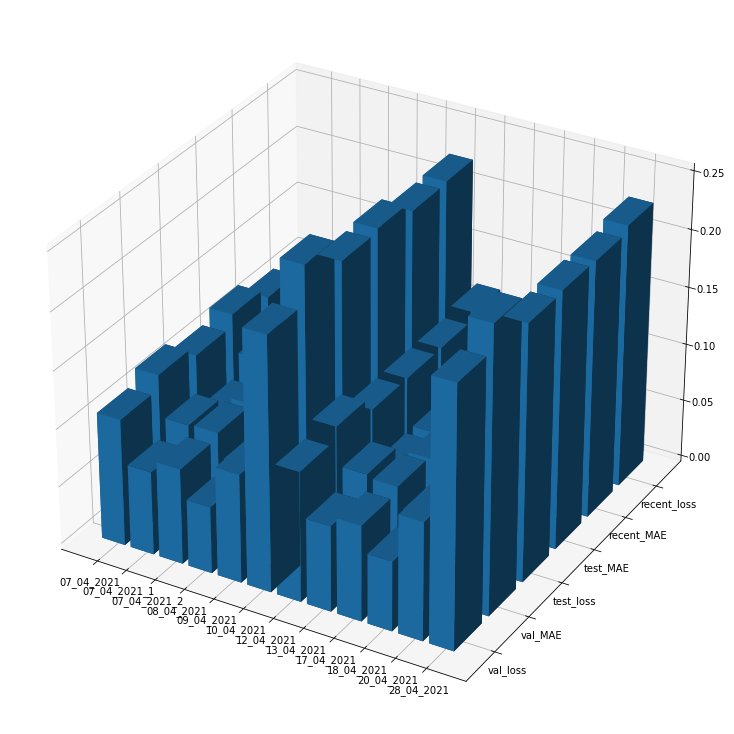

In [44]:
from mpl_toolkits.mplot3d import Axes3D

dx, dy = .8, .8

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)
 
xpos=np.arange(to_plot_lstm_bidi.shape[0])
ypos=np.arange(to_plot_lstm_bidi.shape[1])

ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

zpos=np.zeros(to_plot_lstm_bidi.shape).flatten()

dz = to_plot_lstm_bidi.values.ravel()

ax.bar3d(xpos,ypos,zpos,dx,dy,dz)

ax.w_yaxis.set_ticklabels(to_plot_lstm_bidi.columns)
ax.w_xaxis.set_ticklabels(lstm_bidi_res.Directory_name)

plt.show()


## Plot my PCT comparsion

In [82]:
pct_results_my = pd.read_excel("models_comparsion.xlsx" , skiprows = 158, nrows= 125 , usecols="D,U:Y")  
pct_results_my.dropna(thresh=3, inplace=True)
pct_results_my.rename(columns={"Directory":"Iter_name"}, inplace=True)

In [83]:
pct_results_my.fillna(method='ffill', inplace=True)

In [84]:
pct_results_my.style.background_gradient(cmap="RdYlGn_r", axis="rows")

,Cells,Iter_name,MAE (org),Direction (org),MAE (new),Direction (new)
0,LSTM,07_04_2021,0.468570,44.370000,0.351480,50.010000
1,LSTM - bidirectional,07_04_2021,0.441240,51.630000,0.336810,52.390000
2,GRU,07_04_2021,0.496410,42.120000,0.370700,45.090000
3,GRU - bidirectional,07_04_2021,0.458570,43.090000,0.339700,47.510000
4,LSTM (single),07_04_2021,0.447570,46.320000,0.339370,51.040000
5,LSTM - bidirectional (single),07_04_2021,0.439900,45.210000,0.335480,51.210000
6,GRU (single),07_04_2021,0.444240,43.120000,0.334480,47.760000
7,GRU - bidirectional (single),07_04_2021,0.448070,50.740000,0.335590,55.320000
9,LSTM,07_04_2021_1,0.468070,44.890000,0.344920,48.070000
10,LSTM - bidirectional,07_04_2021_1,0.476240,50.840000,0.344030,54.360000


array([<AxesSubplot:title={'center':'MAE (org)'}>,
       <AxesSubplot:title={'center':'Direction (org)'}>,
       <AxesSubplot:title={'center':'MAE (new)'}>,
       <AxesSubplot:title={'center':'Direction (new)'}>], dtype=object)

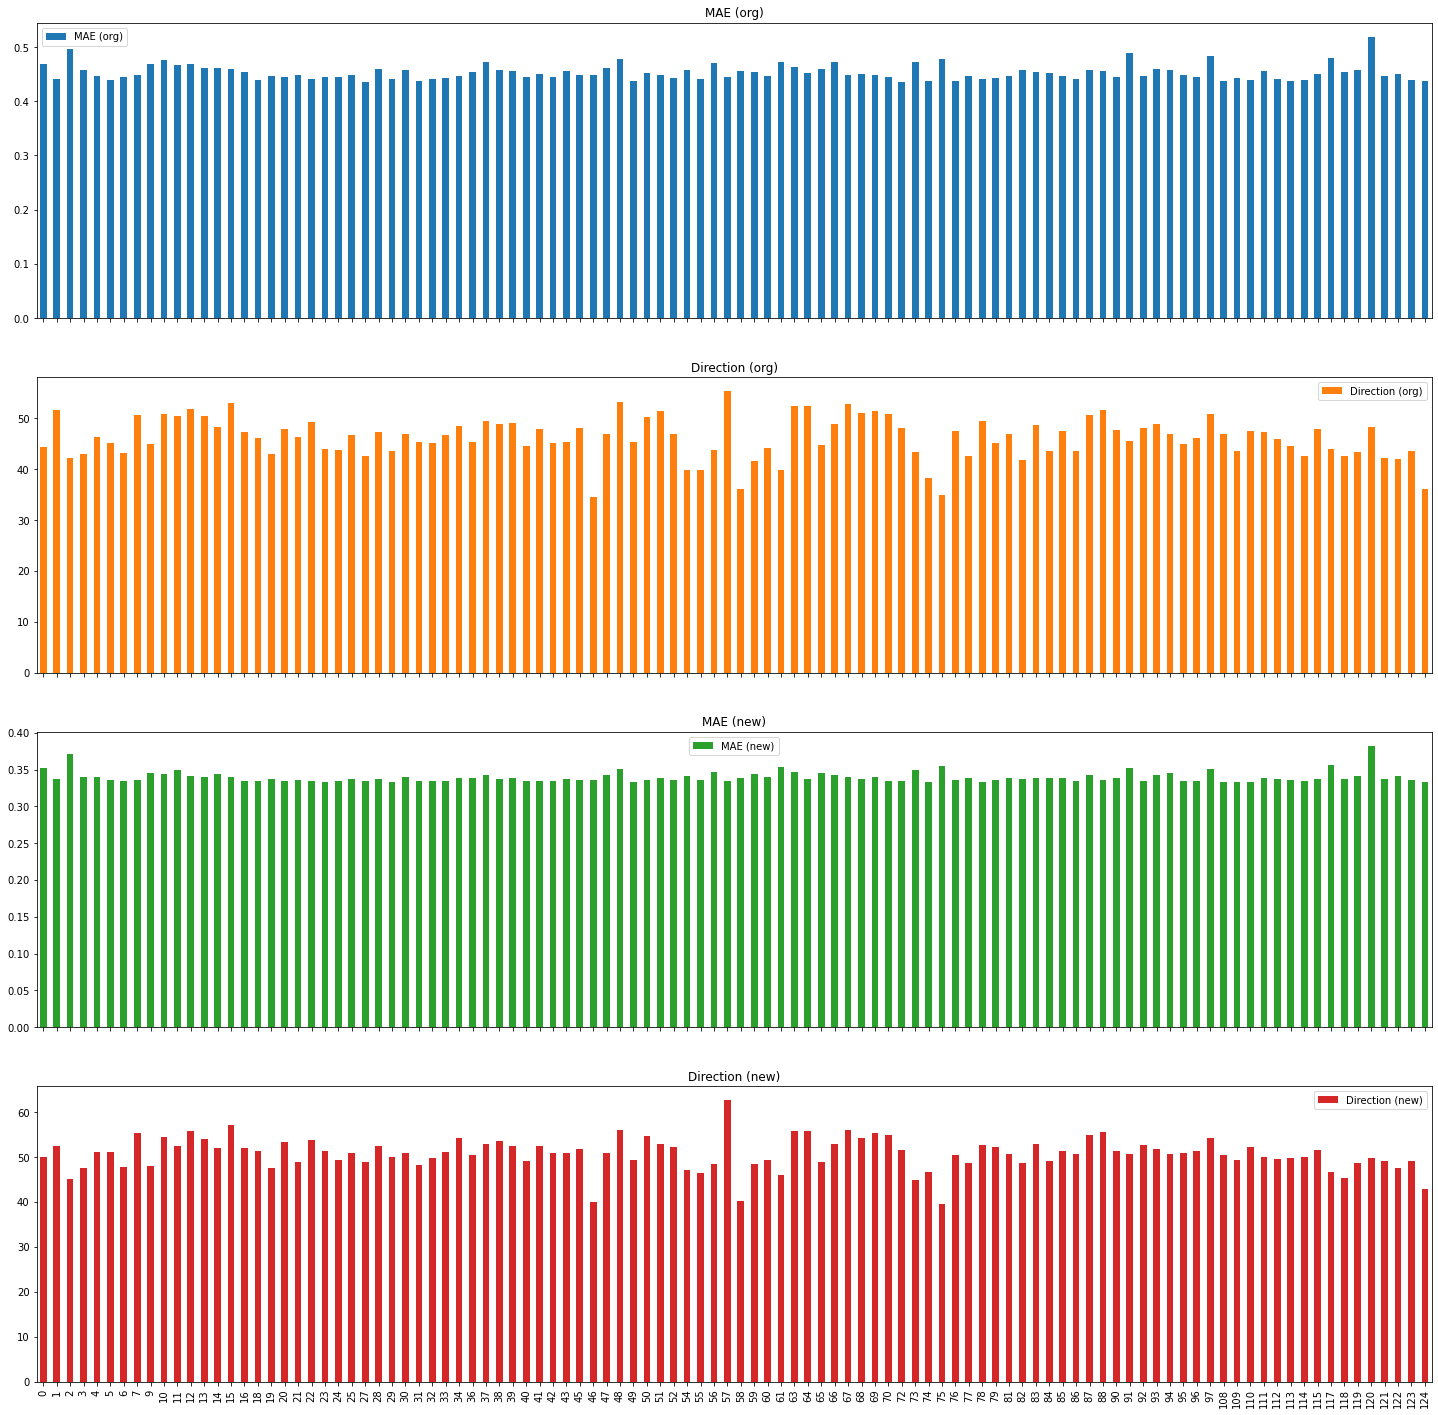

In [85]:
pct_results_my.plot.bar(figsize=(25,25), subplots=True)

## Compare cells 

In [86]:
lstm = pct_results_my.loc[pct_results_my["Cells"] == "LSTM"].copy()
lstm.drop(columns=["Iter_name","Cells"], inplace=True)
lstm_res = lstm.sum()
lstm.sum()

MAE (org)            5.87990
Direction (org)    597.28000
MAE (new)            4.42876
Direction (new)    653.73000
dtype: float64

In [87]:
lstm_bidi = pct_results_my.loc[pct_results_my["Cells"] == "LSTM - bidirectional"].copy()
lstm_bidi.drop(columns=["Iter_name","Cells"], inplace=True)
lstm_bidi_res = lstm_bidi.sum()
lstm_bidi.sum()

MAE (org)            5.95494
Direction (org)    586.23000
MAE (new)            4.41653
Direction (new)    640.79000
dtype: float64

In [88]:
gru = pct_results_my.loc[pct_results_my["Cells"] == "GRU"].copy()
gru.drop(columns=["Iter_name","Cells"], inplace=True)
gru_res = gru.sum()
gru.sum()

MAE (org)            5.93192
Direction (org)    594.66000
MAE (new)            4.44019
Direction (new)    656.08000
dtype: float64

In [89]:
gru_bidi = pct_results_my.loc[pct_results_my["Cells"] == "GRU - bidirectional"].copy()
gru_bidi.drop(columns=["Iter_name","Cells"], inplace=True)
gru_bidi_res = gru_bidi.sum()
gru_bidi.sum()

MAE (org)            6.04991
Direction (org)    617.67000
MAE (new)            4.47955
Direction (new)    667.49000
dtype: float64

In [90]:
lstm_s = pct_results_my.loc[pct_results_my["Cells"] == "LSTM (single)"].copy()
lstm_s.drop(columns=["Iter_name","Cells"], inplace=True)
lstm_s_res = lstm_s.sum()
lstm_s.sum()

MAE (org)            5.80722
Direction (org)    600.73000
MAE (new)            4.38587
Direction (new)    652.74000
dtype: float64

In [91]:
lstm_bidi_s = pct_results_my.loc[pct_results_my["Cells"] == "LSTM - bidirectional (single)"].copy()
lstm_bidi_s.drop(columns=["Iter_name","Cells"], inplace=True)
lstm_bidi_s_res = lstm_bidi_s.sum()
lstm_bidi_s.sum()

MAE (org)            5.81924
Direction (org)    591.20000
MAE (new)            4.38164
Direction (new)    661.78000
dtype: float64

In [92]:
gru_s = pct_results_my.loc[pct_results_my["Cells"] == "GRU (single)"].copy()
gru_s.drop(columns=["Iter_name","Cells"], inplace=True)
gru_s_res = gru_s.sum()
gru_s.sum()

MAE (org)            5.80392
Direction (org)    611.39000
MAE (new)            4.37552
Direction (new)    671.56000
dtype: float64

In [93]:
gru_bidi_s = pct_results_my.loc[pct_results_my["Cells"] == "GRU - bidirectional (single)"].copy()
gru_bidi_s.drop(columns=["Iter_name","Cells"], inplace=True)
gru_bidi_s_res = gru_bidi_s.sum()
gru_bidi_s.sum()

MAE (org)            5.88559
Direction (org)    608.29000
MAE (new)            4.39997
Direction (new)    673.27000
dtype: float64

### MAE

#### Compare MAE (org)

In [94]:
results_MAE = [lstm_res["MAE (org)"], lstm_bidi_res["MAE (org)"], gru_res["MAE (org)"], gru_bidi_res["MAE (org)"], lstm_s_res["MAE (org)"], lstm_bidi_s_res["MAE (org)"], gru_s_res["MAE (org)"], gru_bidi_s_res["MAE (org)"]]
results_MAE_df = pd.DataFrame(results_MAE, index=["LSTM","LSTM - bidirectional","GRU","GRU - bidirectional","LSTM (single)","LSTM - bidirectional (single)","GRU (single)","GRU - bidirectional (single)"], columns = ["MAE (org)"])

<AxesSubplot:ylabel='MAE sum'>

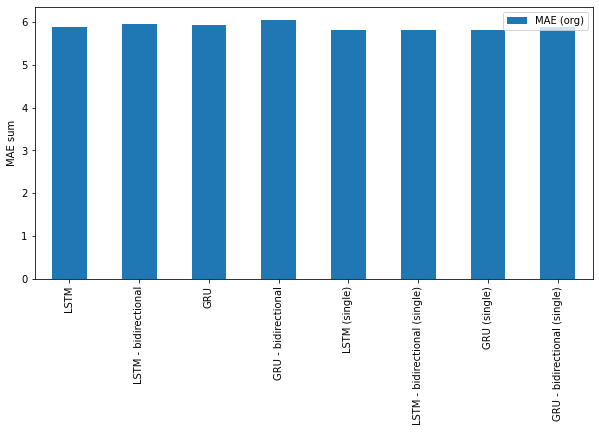

In [95]:
results_MAE_df.plot.bar(figsize=(10,5), ylabel="MAE sum")

#### Compare MAE (new)

In [96]:
results_MAE_new = [lstm_res["MAE (new)"], lstm_bidi_res["MAE (new)"], gru_res["MAE (new)"], gru_bidi_res["MAE (new)"], lstm_s_res["MAE (new)"], lstm_bidi_s_res["MAE (new)"], gru_s_res["MAE (new)"], gru_bidi_s_res["MAE (new)"]]
results_MAE_df_new = pd.DataFrame(results_MAE_new, index=["LSTM","LSTM - bidirectional","GRU","GRU - bidirectional","LSTM (single)","LSTM - bidirectional (single)","GRU (single)","GRU - bidirectional (single)"], columns = ["MAE (new)"])

<AxesSubplot:ylabel='MAE sum'>

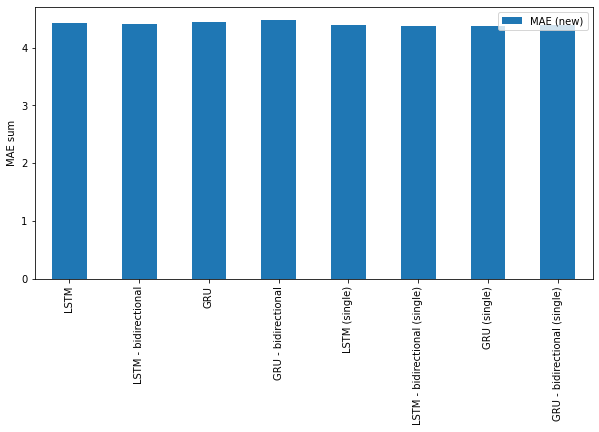

In [97]:
results_MAE_df_new.plot.bar(figsize=(10,5), ylabel="MAE sum")

#### MAE combination

In [98]:
MAE_comb_df = pd.DataFrame({"MAE (org)":results_MAE,"MAE (new)":results_MAE_new}, index=["LSTM","LSTM - bidirectional","GRU","GRU - bidirectional","LSTM (single)","LSTM - bidirectional (single)","GRU (single)","GRU - bidirectional (single)"])

In [99]:
MAE_comb_df["MAE sum"] = MAE_comb_df["MAE (org)"] + MAE_comb_df["MAE (new)"]
MAE_comb_df.style.background_gradient(cmap="RdYlGn_r", axis="rows")

,MAE (org),MAE (new),MAE sum
LSTM,5.879900,4.428760,10.308660
LSTM - bidirectional,5.954940,4.416530,10.371470
GRU,5.931920,4.440190,10.372110
GRU - bidirectional,6.049910,4.479550,10.529460
LSTM (single),5.807220,4.385870,10.193090
LSTM - bidirectional (single),5.819240,4.381640,10.200880
GRU (single),5.803920,4.375520,10.179440
GRU - bidirectional (single),5.885590,4.399970,10.285560


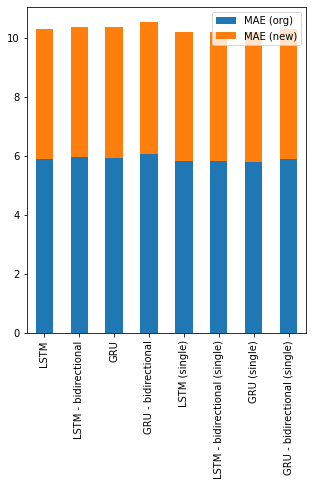

In [100]:
ax = MAE_comb_df[["MAE (org)","MAE (new)"]].plot.bar(figsize=(5,6), stacked=True)

### Average Direction

#### Org

In [101]:
avg = lstm.shape[0]

<AxesSubplot:ylabel='Direction sum'>

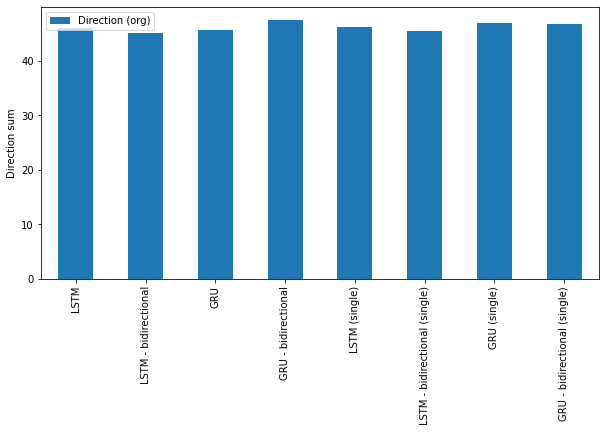

In [102]:
results_DIRECTION = [lstm_res["Direction (org)"]/avg, lstm_bidi_res["Direction (org)"]/avg, gru_res["Direction (org)"]/avg, gru_bidi_res["Direction (org)"]/avg, lstm_s_res["Direction (org)"]/avg, lstm_bidi_s_res["Direction (org)"]/avg, gru_s_res["Direction (org)"]/avg, gru_bidi_s_res["Direction (org)"]/avg]
results_DIRECTION_df = pd.DataFrame(results_DIRECTION, index=["LSTM","LSTM - bidirectional","GRU","GRU - bidirectional","LSTM (single)","LSTM - bidirectional (single)","GRU (single)","GRU - bidirectional (single)"], columns = ["Direction (org)"])

results_DIRECTION_df.plot.bar(figsize=(10,5), ylabel="Direction sum")

#### New

<AxesSubplot:ylabel='Direction sum'>

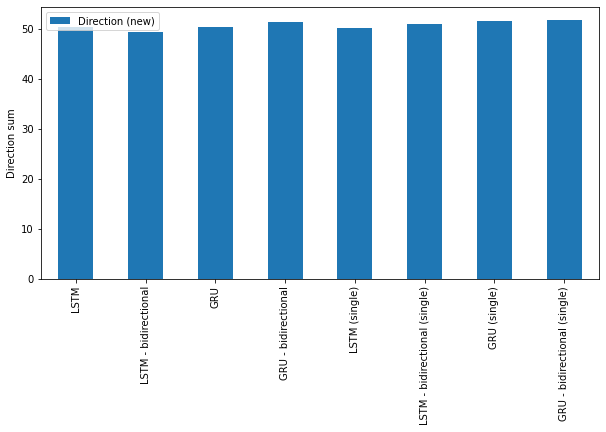

In [103]:
results_DIRECTION_new = [lstm_res["Direction (new)"]/avg, lstm_bidi_res["Direction (new)"]/avg, gru_res["Direction (new)"]/avg, gru_bidi_res["Direction (new)"]/avg, lstm_s_res["Direction (new)"]/avg, lstm_bidi_s_res["Direction (new)"]/avg, gru_s_res["Direction (new)"]/avg, gru_bidi_s_res["Direction (new)"]/avg]
results_DIRECTION_df_new = pd.DataFrame(results_DIRECTION_new, index=["LSTM","LSTM - bidirectional","GRU","GRU - bidirectional","LSTM (single)","LSTM - bidirectional (single)","GRU (single)","GRU - bidirectional (single)"], columns = ["Direction (new)"])

results_DIRECTION_df_new.plot.bar(figsize=(10,5), ylabel="Direction sum")

### Combination

In [104]:
DIRECTION_comb_df = pd.DataFrame({"Direction (org)":results_DIRECTION,"Direction (new)":results_DIRECTION_new}, index=["LSTM","LSTM - bidirectional","GRU","GRU - bidirectional","LSTM (single)","LSTM - bidirectional (single)","GRU (single)","GRU - bidirectional (single)"])

In [105]:
DIRECTION_comb_df["Direction sum"] = (DIRECTION_comb_df["Direction (org)"] + results_DIRECTION_df_new["Direction (new)"])/2
DIRECTION_comb_df.style.background_gradient(cmap="RdYlGn", axis="rows")

,Direction (org),Direction (new),Direction sum
LSTM,45.944615,50.286923,48.115769
LSTM - bidirectional,45.094615,49.291538,47.193077
GRU,45.743077,50.467692,48.105385
GRU - bidirectional,47.513077,51.345385,49.429231
LSTM (single),46.210000,50.210769,48.210385
LSTM - bidirectional (single),45.476923,50.906154,48.191538
GRU (single),47.030000,51.658462,49.344231
GRU - bidirectional (single),46.791538,51.790000,49.290769


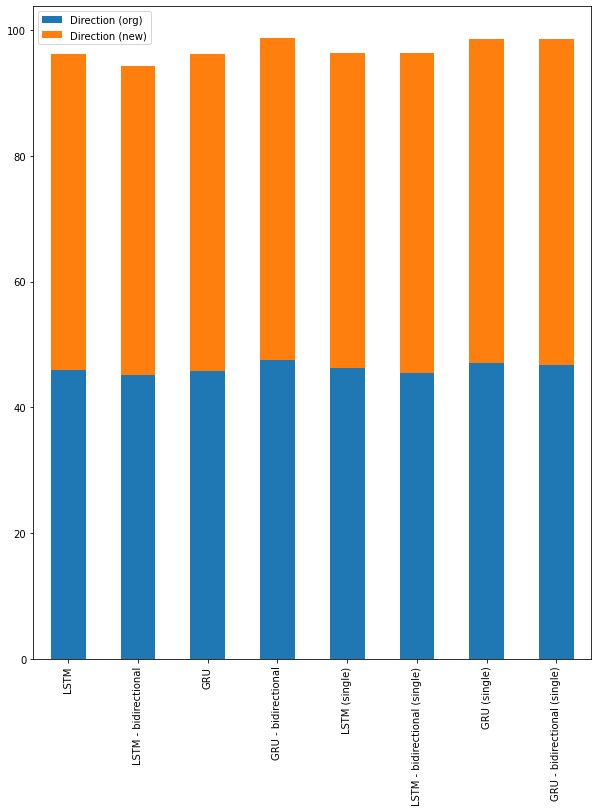

In [106]:
ax = DIRECTION_comb_df[["Direction (org)","Direction (new)"]].plot.bar(figsize=(10,12), stacked=True)